# Visualization of simulated spatial data

## 0. Load packages & simulated datasets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import numpy as np

import sys
sys.path.append('./utils/')
from smoother.simulation.gp import plot_spatial, generate_grid

In [2]:
IN_DIR = '~/Projects/SpatialDeconv/data/donut_synthetic/ne10_rz15_no_smooth'

In [3]:
n_locations = [50,50]
n_experiments = 10
experiment_id = np.repeat(np.arange(n_experiments), np.prod(n_locations))

In [5]:
zone_abundances_df = pd.read_csv(IN_DIR + "/zone_abundances.csv", index_col=0)

markers = pd.read_csv(IN_DIR + "/markers_ranked_membership.csv", index_col=0)
cell_count_df = pd.read_csv(IN_DIR + "/celltype_counts.csv", index_col=0)
cell_capture_eff_df = pd.read_csv(IN_DIR + "/celltype_capture_eff.csv", index_col=0)
cell_abundances_df = pd.read_csv(IN_DIR + "/celltype_abundances.csv", index_col=0)
cell_types2zones = pd.read_csv(IN_DIR + "/celltype_zone_assignment.csv", index_col=0)

## 1. Spatial patterns in different zones

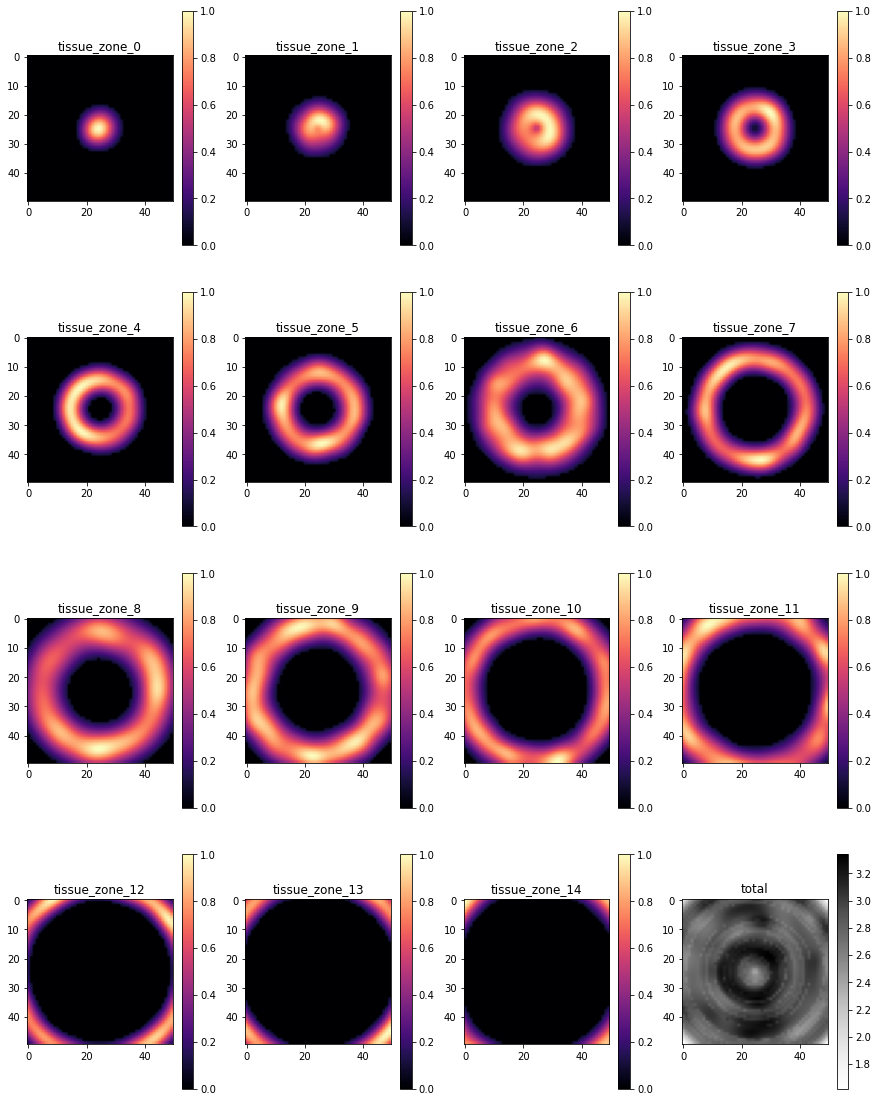

In [7]:
# plot the first experiment
plt.figure(figsize=(15, 25))
plot_spatial(zone_abundances_df.values[experiment_id==0,:],grid_size=n_locations, names=zone_abundances_df.columns)
plt.show()

## 2. Spatial patterns of different cell types

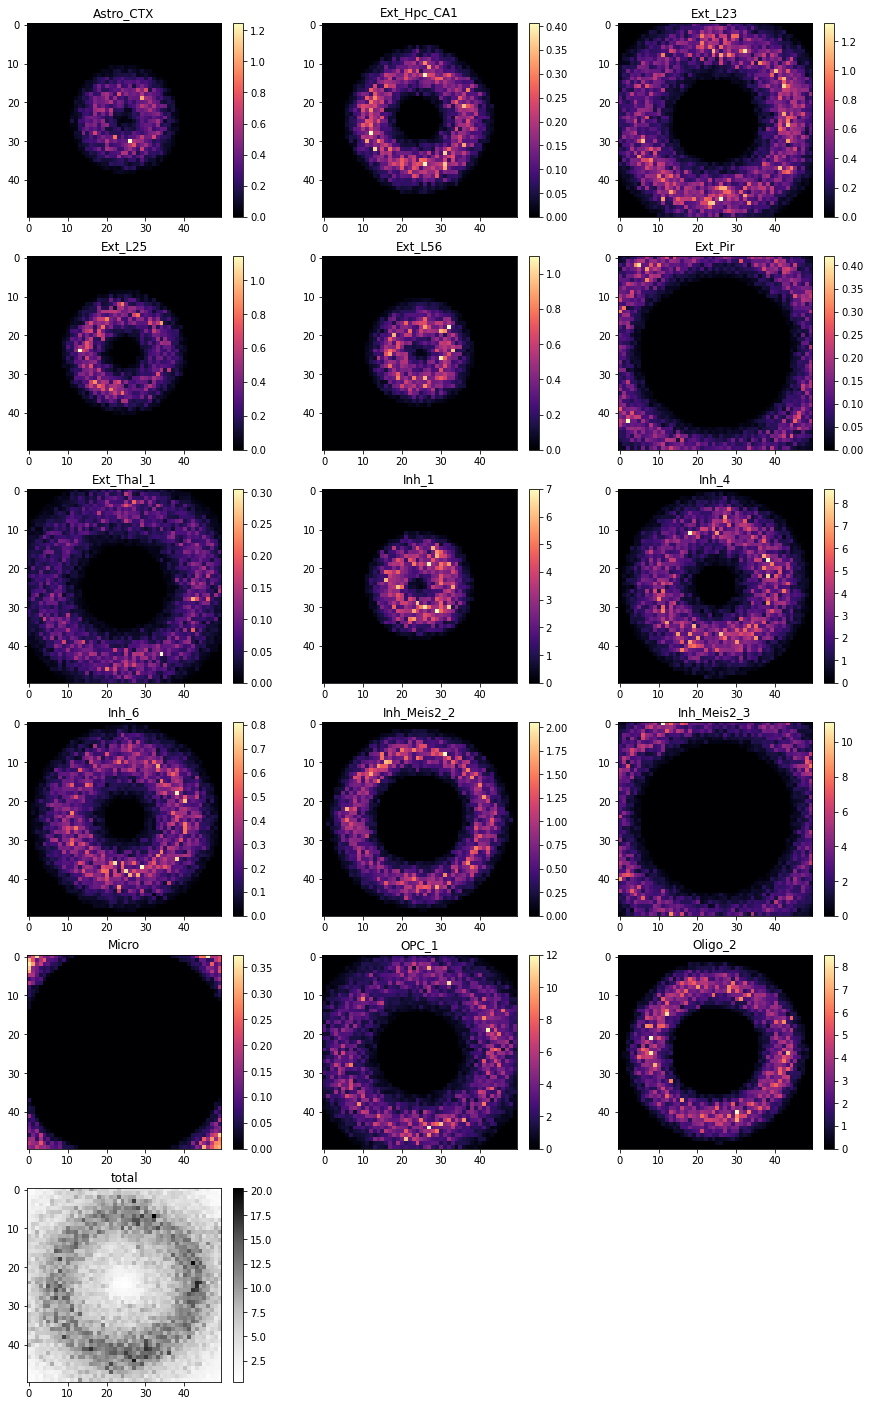

In [8]:
plt.figure(figsize=(15, 25))
plot_spatial(cell_abundances_df.values[experiment_id==0,:], 
             grid_size=n_locations, nrows=6, 
             names=cell_abundances_df.columns, vmax=None)
plt.show()

Text(0.5, 1.0, 'cell capture efficiencies')

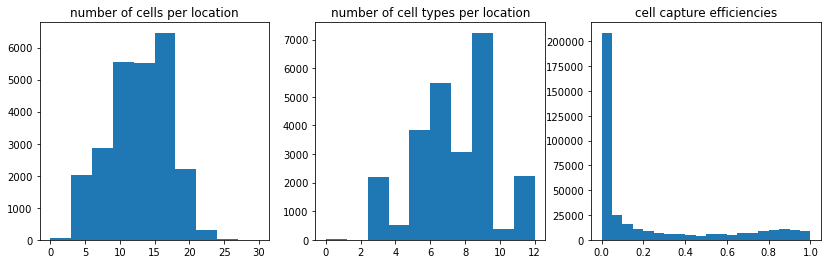

In [9]:
## check important statistics
ct_per_loc = (cell_count_df>0).sum(1)
f, axes = plt.subplots(1, 3, figsize=(14,4))
axes[0].hist(cell_count_df.sum(1),)
axes[0].set_title('number of cells per location')
axes[1].hist(ct_per_loc)
axes[1].set_title('number of cell types per location')
axes[2].hist(cell_capture_eff_df.to_numpy().flatten(), 20)
axes[2].set_title('cell capture efficiencies')

## 3. Marker gene expressions

In [11]:
exp = 0
expression = pd.read_csv(IN_DIR + f"/deconv_inputs/syn_sp_count_markers_exp{exp}.csv", index_col=0)

In [12]:
select = (markers[markers>0].min(axis=1) == 1)
markers2plot = markers.index[select]

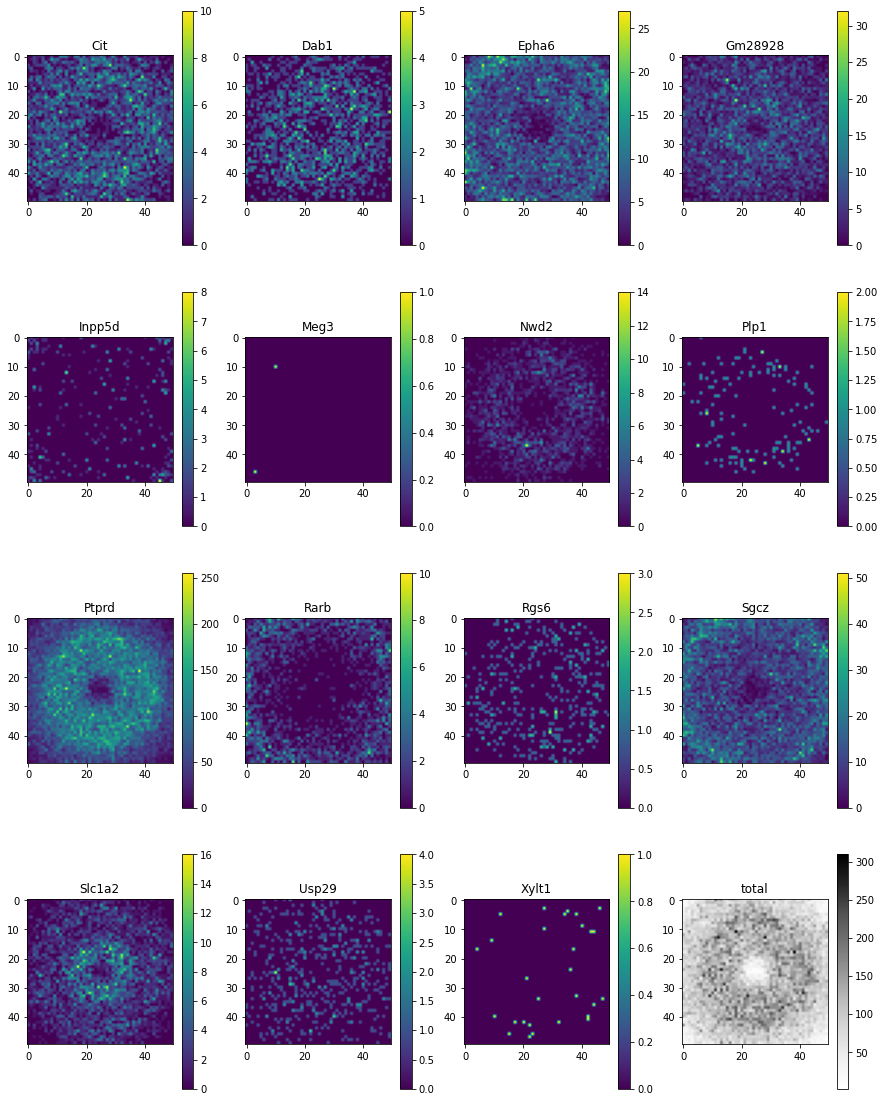

In [14]:
plt.figure(figsize=(15, 25))
plot_spatial(expression[markers2plot].values, grid_size = n_locations, names=markers2plot, cmap = "viridis", vmax=None)